## 1.Import Packages

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df = pd.read_csv('heartdisease.csv')

In [178]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [179]:
df = df.replace({'sex':{0:'Female',1:'Male'}});
df = df.replace({'cp':{1:'typical angina',2:'atypical angine',3:'non-anginal pain',4:'asymptomatic'}})
df = df.replace({'fbs':{0:'< 120 mg/dl',1:'> 120 mg/dl'}})
df = df.replace({'restecg':{0:'normal',1:'having ST-T wave abnormality',2:'showing probable'}})
df = df.replace({'exang':{1:'yes',0:'no'}})
df = df.replace({'slope':{1:'upsloping',2:'flat',3:'downsloping'}})
# df = df.replace({'thal':{3:'normal',6:'fixed defect',7:'reversable defect'}})
df = df.replace({'target':{0:'no heart disease',1:'heart disease'}})
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure(mm/Hg)','serum_cholestrol(mg/dl)','fasting_blood_sugar','resting_electrocardiographic_results','maximum_heart_rate','excercise_induced_angina','ST_deperssion_induced_by_excercise','slope','number_of_major_vessels','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure(mm/Hg),serum_cholestrol(mg/dl),fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,excercise_induced_angina,ST_deperssion_induced_by_excercise,slope,number_of_major_vessels,thalassemia,target
0,63,Male,typical angina,145,233,> 120 mg/dl,showing probable,150,no,2.3,downsloping,0,6,0
1,67,Male,asymptomatic,160,286,< 120 mg/dl,showing probable,108,yes,1.5,flat,3,3,1
2,67,Male,asymptomatic,120,229,< 120 mg/dl,showing probable,129,yes,2.6,flat,2,7,1
3,37,Male,non-anginal pain,130,250,< 120 mg/dl,normal,187,no,3.5,downsloping,0,3,0
4,41,Female,atypical angine,130,204,< 120 mg/dl,showing probable,172,no,1.4,upsloping,0,3,0


In [180]:
sakit = len(df[df['target'] == 'heart disease'])
tidakSakit = len(df[df['target'] == 'no heart disease'])
totalPasien = sakit + tidakSakit

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


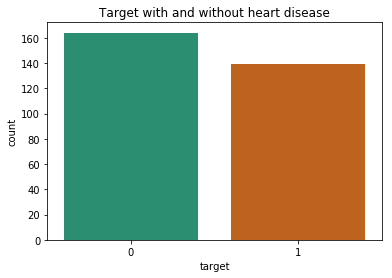

In [57]:
sns.countplot(x='target', data=df,palette='Dark2')
plt.title('Target with and without heart disease')
plt.savefig('target.png')

In [58]:
pria = len(df[df['sex'] == 'Male'])
wanita = len(df[df['sex'] == 'Female'])
total = pria + wanita
print('Presentase pasien pria {} %'.format(round((pria/total)*100)))
print('Presentase pasien wanita {} %'.format(round((wanita/total)*100)))

Presentase pasien pria 68 %
Presentase pasien wanita 32 %


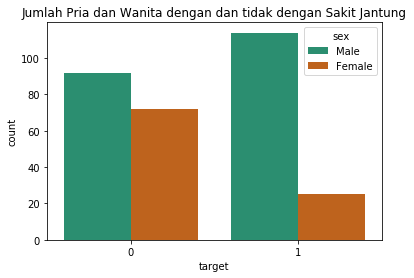

In [59]:
sns.countplot(df['target'],hue=df['sex'],palette='Dark2')
plt.title('Jumlah Pria dan Wanita dengan dan tidak dengan Sakit Jantung')
plt.savefig('jmlhpriawanita.png')

In [60]:
priaSakit = len(df[(df['sex']=='Male')& (df['target'] == 'heart disease')])
priaTidakSakit = len(df[(df['sex']=='Male')& (df['target'] == 'no heart disease')])
wanitaSakit = len(df[(df['sex']=='Female')& (df['target'] == 'heart disease')])
wanitaTidakSakit = len(df[(df['sex']=='Female')& (df['target'] == 'no heart disease')])

Text(0.5, 1.0, 'Presentase pasien Pria & Wanita')

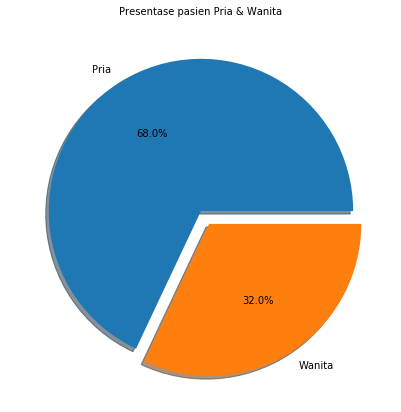

In [11]:
pria = len(df[df['sex'] == 'Male'])
wanita = len(df[df['sex'] == 'Female'])
explode = (0,0.1)
plt.figure(figsize=(7,7))
plt.pie([pria,wanita],labels=['Pria','Wanita'],explode=explode,autopct='%1.1f%%',shadow=True)
plt.title('Presentase pasien Pria & Wanita',fontsize=10)
# plt.savefig('priadanwanita.png')

Text(0.5, 1.0, 'Presentase Pria Tidak dan Dengan Heart Disease')

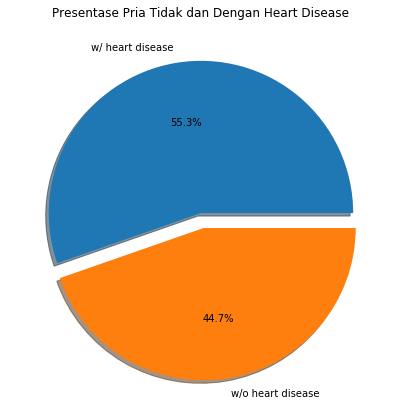

In [12]:
priaSakit = len(df[(df['sex']=='Male')& (df['target'] == 1)])
priaTidakSakit = len(df[(df['sex']=='Male')& (df['target'] == 0)])
wanitaSakit = len(df[(df['sex']=='Female')& (df['target'] == 1)])
wanitaTidakSakit = len(df[(df['sex']=='Female')& (df['target'] == 0)])
explode = (0,0.1)
plt.figure(figsize=(7,7))
plt.pie([priaSakit,priaTidakSakit],labels=['w/ heart disease','w/o heart disease'],explode=explode,autopct='%1.1f%%',shadow=True)
plt.title('Presentase Pria Tidak dan Dengan Heart Disease')
# plt.savefig('priasakitatautidak.png')

Text(0.5, 1.0, 'Presentase Wanita Tidak dan Dengan Heart Disease')

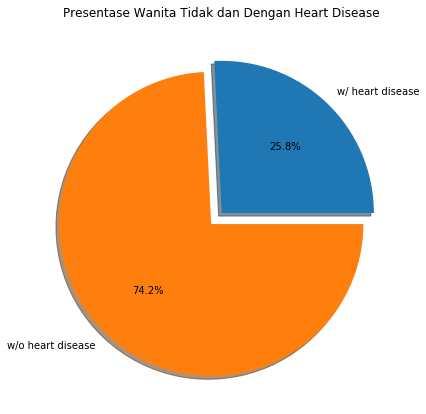

In [14]:
wanitaSakit = len(df[(df['sex']=='Female')& (df['target'] == 1)])
wanitaTidakSakit = len(df[(df['sex']=='Female')& (df['target'] == 0)])
explode = (0,0.1)
plt.figure(figsize=(7,7))
plt.pie([wanitaSakit,wanitaTidakSakit],labels=['w/ heart disease','w/o heart disease'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Presentase Wanita Tidak dan Dengan Heart Disease')
# plt.savefig('wanitasakitatautidak.png')

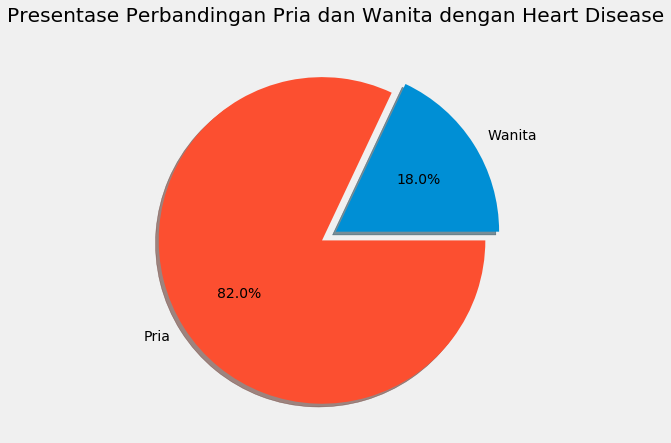

In [71]:
priaSakit = len(df[(df['sex']=='Male')& (df['target'] == 'heart disease')])
wanitaSakit = len(df[(df['sex']=='Female')& (df['target'] == 'heart disease')])
explode = (0,0.1)
plt.figure(figsize=(7,7))
plt.pie([wanitaSakit,priaSakit],labels=['Wanita','Pria'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Presentase Perbandingan Pria dan Wanita dengan Heart Disease')
plt.savefig('presentasewanitapria.png')

Text(0.5, 1.0, 'Presentase Perbandingan Pria dan Wanita tidak dengan Heart Disease')

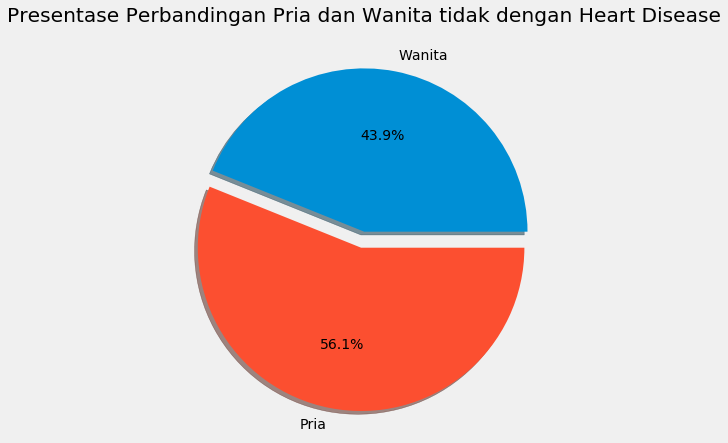

In [72]:
priaTidakSakit = len(df[(df['sex']=='Male')& (df['target'] == 'no heart disease')])
wanitaTidakSakit = len(df[(df['sex']=='Female')& (df['target'] == 'no heart disease')])
explode=(0,0.1)
plt.figure(figsize=(7,7))
plt.pie([wanitaTidakSakit,priaTidakSakit],labels=['Wanita','Pria'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Presentase Perbandingan Pria dan Wanita tidak dengan Heart Disease')

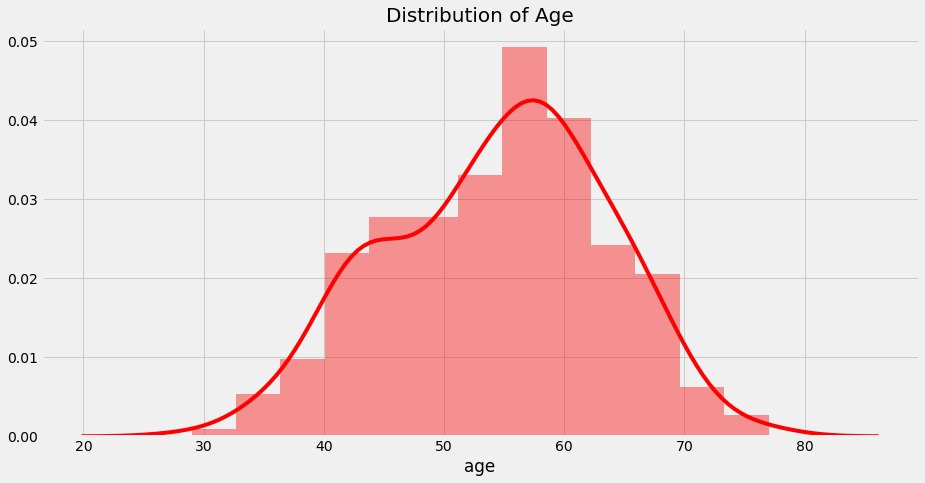

In [77]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(df['age'],color='r')
plt.title('Distribution of Age', fontsize=20)
plt.savefig('agedistribution.png')

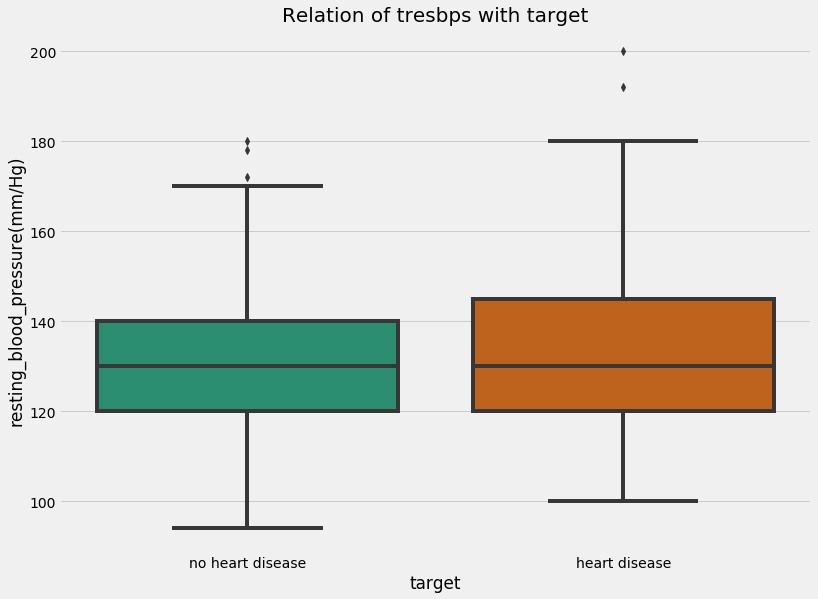

In [78]:
# tresbps vs target
plt.rcParams['figure.figsize'] = (12,9)
sns.boxplot(df['target'], df['resting_blood_pressure(mm/Hg)'], palette='Dark2')
plt.title('Relation of tresbps with target',fontsize =20)
plt.savefig('tresbpswtarget.png')

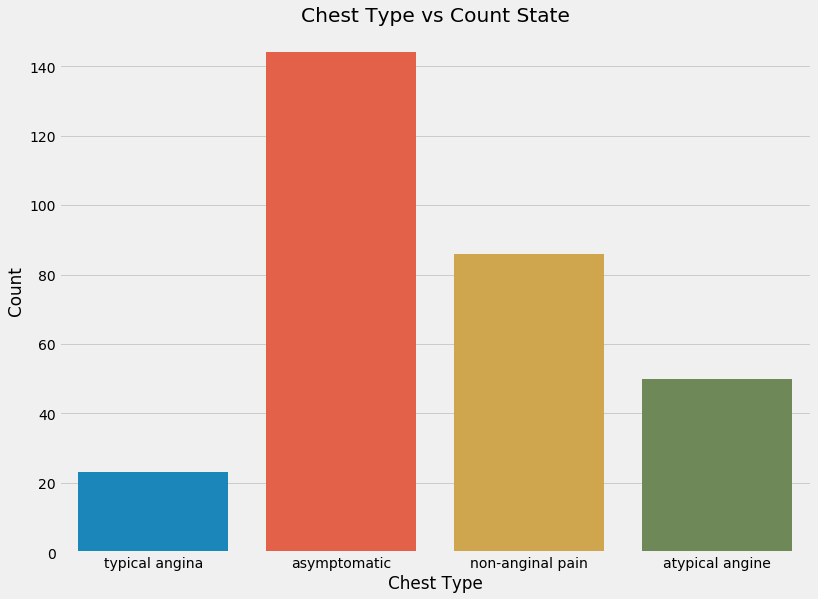

In [79]:
sns.countplot(df.chest_pain_type)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.savefig('jmlorgdgntipedada.png')

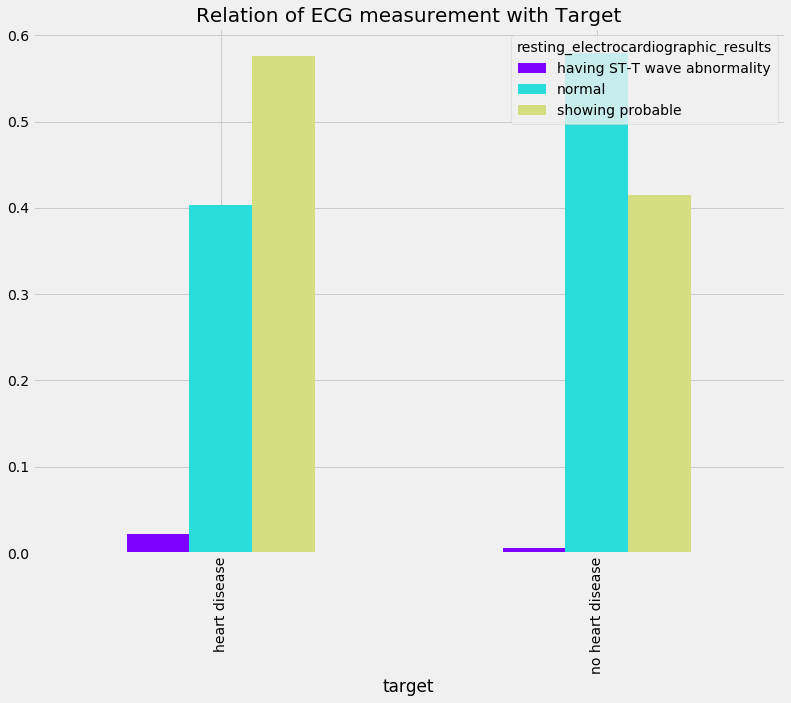

In [85]:
# Resting electrocardiographic measurement vs target
plt.rcParams['figure.figsize'] = (12,9)
dat = pd.crosstab(df['target'], df['resting_electrocardiographic_results'])
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=False,color=plt.cm.rainbow(np.linspace(0,1,4)))
plt.title('Relation of ECG measurement with Target',fontsize=20,fontweight = 30)
plt.xticks(rotation=90)
plt.savefig('hubecgdantarget.png')

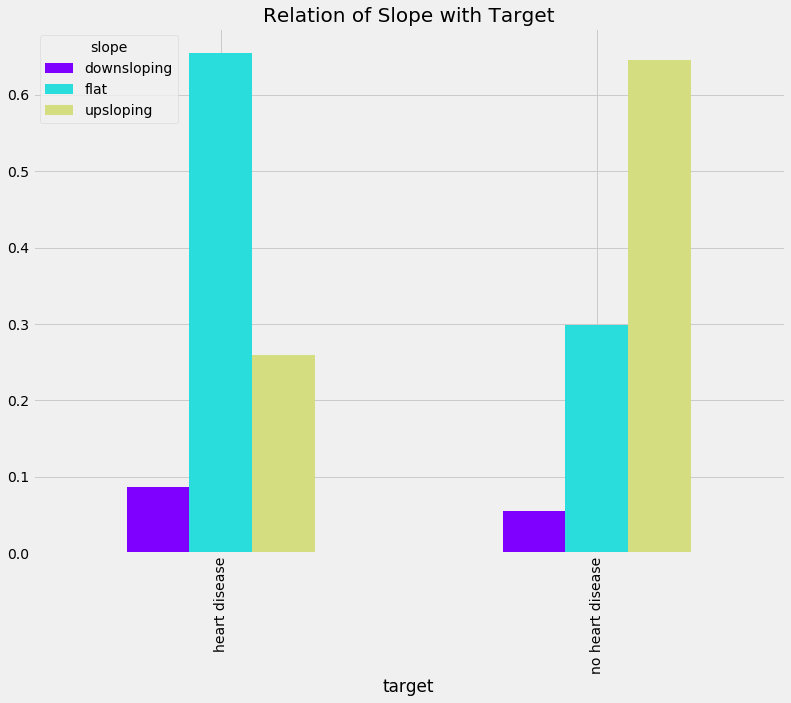

In [81]:
# checking the relation between slope and target
plt.rcParams['figure.figsize'] = (12,9)
dat = pd.crosstab(df['target'], df['slope'])
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=False,color=plt.cm.rainbow(np.linspace(0,1,4)))
plt.title('Relation of Slope with Target',fontsize=20,fontweight = 30)
plt.savefig('hubslopedgntarget.png')

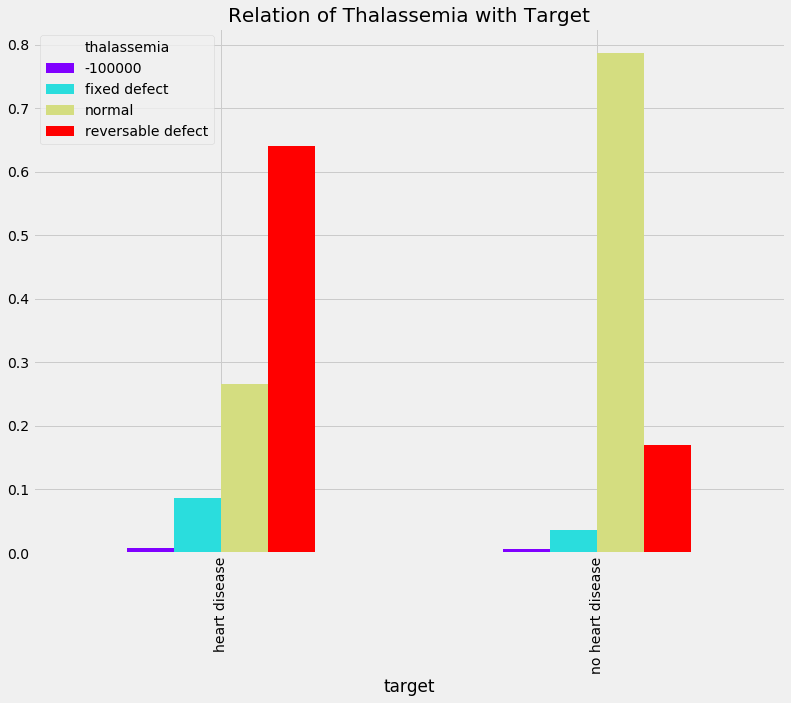

In [82]:
# Number of majos vessels(0-3)

plt.rcParams['figure.figsize'] = (12,9)
dat = pd.crosstab(df['target'], df['thalassemia'])
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind='bar',stacked=False,color=plt.cm.rainbow(np.linspace(0,1,4)))
plt.title('Relation of Thalassemia with Target',fontsize=20,fontweight = 30)
plt.savefig('hubthaldgntarget.png')

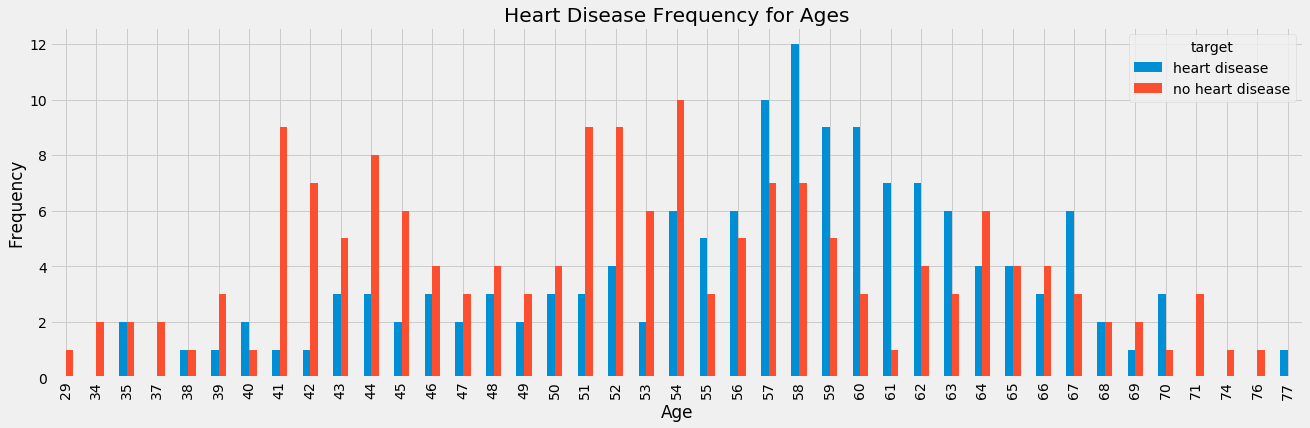

In [83]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')

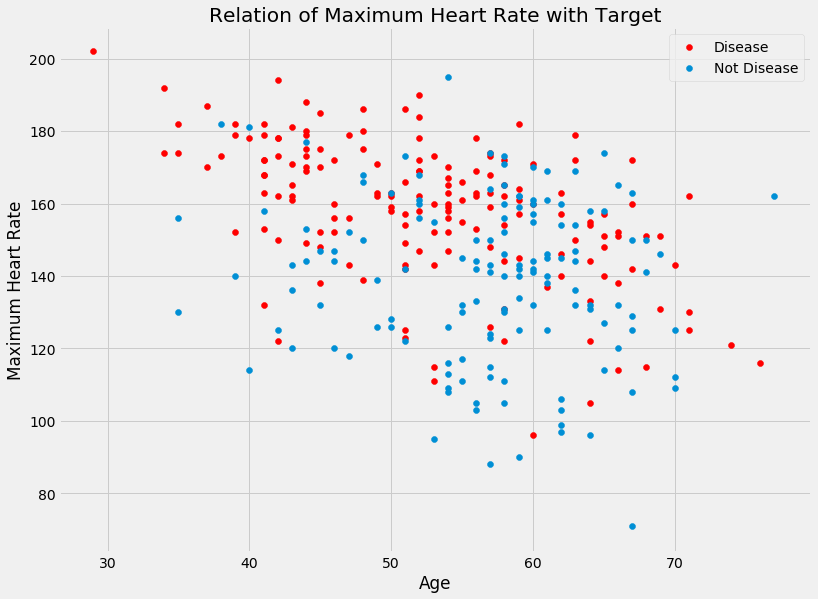

In [84]:
plt.scatter(x=df.age[df.target=='no heart disease'], y=df.maximum_heart_rate[(df.target=='no heart disease')], c="red")
plt.scatter(x=df.age[df.target=='heart disease'], y=df.maximum_heart_rate[(df.target=='heart disease')])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title('Relation of Maximum Heart Rate with Target')
plt.savefig('maximum.png')

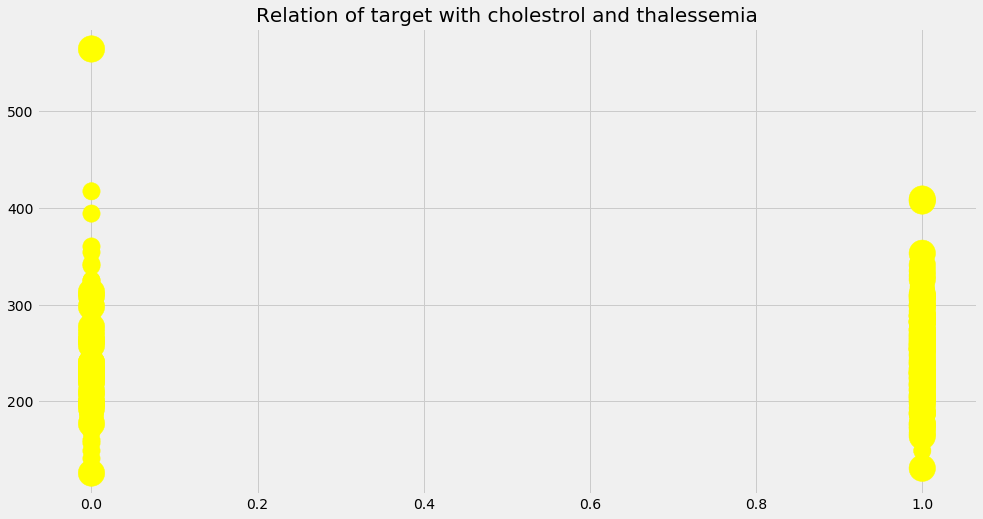

In [94]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
plt.scatter(x = df['target'], y = df['serum_cholestrol(mg/dl)'], s = df['thalassemia']*100, color = 'yellow')
plt.title('Relation of target with cholestrol and thalessemia', fontsize = 20, fontweight = 30)
plt.savefig('cholthal.png')

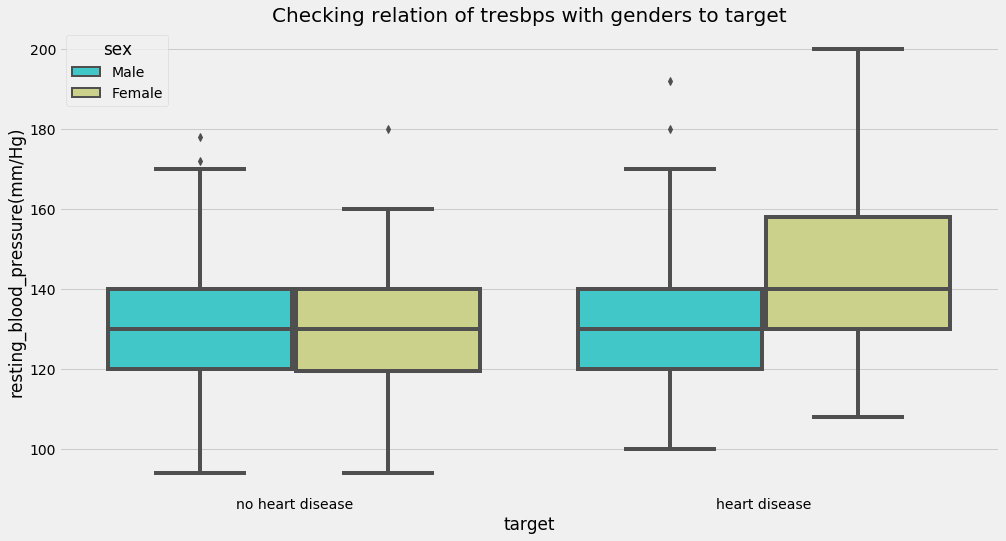

In [98]:
sns.boxplot(x = df['target'], y = df['resting_blood_pressure(mm/Hg)'], hue = df['sex'], palette = 'rainbow')
plt.title('Checking relation of tresbps with genders to target', fontsize = 20, fontweight = 30)
plt.savefig('ceco.png')

In [181]:
dataDum = pd.get_dummies(df[['sex','chest_pain_type','fasting_blood_sugar','resting_electrocardiographic_results','excercise_induced_angina','slope','number_of_major_vessels','thalassemia']])
dataDum.head(3)

,number_of_major_vessels,thalassemia,sex_Female,sex_Male,chest_pain_type_asymptomatic,chest_pain_type_atypical angine,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_results_having ST-T wave abnormality,resting_electrocardiographic_results_normal,resting_electrocardiographic_results_showing probable,excercise_induced_angina_no,excercise_induced_angina_yes,slope_downsloping,slope_flat,slope_upsloping
0,0,6,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0
1,3,3,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,2,7,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0


In [182]:
dataFinal = pd.concat([df,dataDum],axis=1)
dataFinal.drop(df[['sex','chest_pain_type','fasting_blood_sugar','resting_electrocardiographic_results','excercise_induced_angina','slope','number_of_major_vessels','thalassemia']],
              axis=1,inplace=True)
dataFinal

,age,resting_blood_pressure(mm/Hg),serum_cholestrol(mg/dl),maximum_heart_rate,ST_deperssion_induced_by_excercise,target,sex_Female,sex_Male,chest_pain_type_asymptomatic,chest_pain_type_atypical angine,...,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_results_having ST-T wave abnormality,resting_electrocardiographic_results_normal,resting_electrocardiographic_results_showing probable,excercise_induced_angina_no,excercise_induced_angina_yes,slope_downsloping,slope_flat,slope_upsloping
0,63,145,233,150,2.3,0,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
1,67,160,286,108,1.5,1,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0
2,67,120,229,129,2.6,1,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0
3,37,130,250,187,3.5,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
5,56,120,236,178,0.8,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
6,62,140,268,160,3.6,1,1,0,1,0,...,1,0,0,0,1,1,0,1,0,0
7,57,120,354,163,0.6,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
8,63,130,254,147,1.4,1,0,1,1,0,...,1,0,0,0,1,1,0,0,1,0
9,53,140,203,155,3.1,1,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0


## Import Models and Train

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

x = dataFinal.drop(['target'],axis=1)
y = dataFinal['target']


In [248]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2)

## Logistic Regression

In [249]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:
predictions = model.predict(x_test)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [251]:
predictProb = model.predict_proba(x_test)
predictProb

array([[0.93998906, 0.06001094],
       [0.65366044, 0.34633956],
       [0.95112024, 0.04887976],
       [0.02955519, 0.97044481],
       [0.96974017, 0.03025983],
       [0.022825  , 0.977175  ],
       [0.95134123, 0.04865877],
       [0.90172328, 0.09827672],
       [0.96495504, 0.03504496],
       [0.9812248 , 0.0187752 ],
       [0.22523963, 0.77476037],
       [0.88389527, 0.11610473],
       [0.80383446, 0.19616554],
       [0.98356073, 0.01643927],
       [0.51504275, 0.48495725],
       [0.29223265, 0.70776735],
       [0.36293958, 0.63706042],
       [0.97605488, 0.02394512],
       [0.75790381, 0.24209619],
       [0.03010659, 0.96989341],
       [0.72387785, 0.27612215],
       [0.99160744, 0.00839256],
       [0.05974167, 0.94025833],
       [0.91767691, 0.08232309],
       [0.7891266 , 0.2108734 ],
       [0.42626179, 0.57373821],
       [0.81060283, 0.18939717],
       [0.48133576, 0.51866424],
       [0.75035758, 0.24964242],
       [0.85460961, 0.14539039],
       [0.

In [252]:
predictions = []
for pred in predictProb[:,0]:
    if (pred > 0.5):
        predictions.append(0)
    else:
        predictions.append(1)
predictions

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1]

## Logistic Regression Evalutaion

In [253]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

In [254]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.86      0.73      0.79        26

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [255]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns=['P No', 'P Yes'], index = ['A No', 'A Yes'])
con

,P No,P Yes
A No,32,3
A Yes,7,19


In [256]:
accuracy_score(y_test, predictions)

0.8360655737704918

In [257]:
matthews_corrcoef(y_test,predictions)

0.6643145447683179

In [258]:
log_loss(y_test, predictions)

5.662133815432744

In [259]:
print(model.score(x_train,y_train))

0.8223140495867769


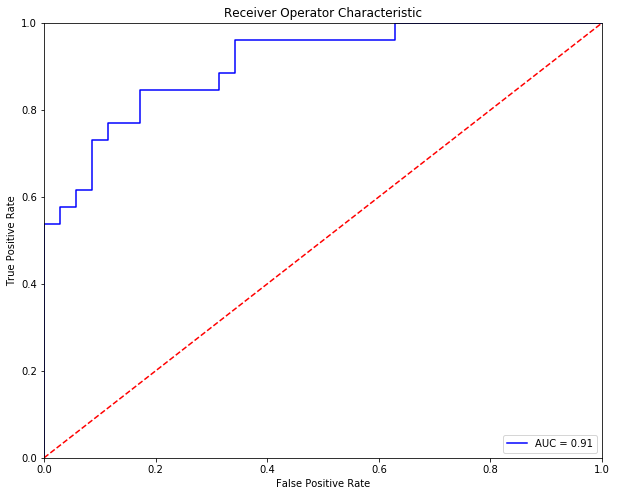

In [260]:
preds = predictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM (Support Vector Machine)

In [271]:
modelSVC = SVC(kernel='linear', probability=True)
modelSVC.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [272]:
predictions = modelSVC.predict(x_test)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [274]:
predictProb = modelSVC.predict_proba(x_test)
predictProb

array([[0.87011292, 0.12988708],
       [0.55649055, 0.44350945],
       [0.92238629, 0.07761371],
       [0.05595932, 0.94404068],
       [0.90917388, 0.09082612],
       [0.07937251, 0.92062749],
       [0.89667613, 0.10332387],
       [0.80182785, 0.19817215],
       [0.8607729 , 0.1392271 ],
       [0.94719506, 0.05280494],
       [0.36458904, 0.63541096],
       [0.85489538, 0.14510462],
       [0.70094972, 0.29905028],
       [0.94007823, 0.05992177],
       [0.58445112, 0.41554888],
       [0.33057337, 0.66942663],
       [0.39421453, 0.60578547],
       [0.93632592, 0.06367408],
       [0.69529088, 0.30470912],
       [0.10633352, 0.89366648],
       [0.59320582, 0.40679418],
       [0.95700609, 0.04299391],
       [0.13758697, 0.86241303],
       [0.7529991 , 0.2470009 ],
       [0.78351057, 0.21648943],
       [0.46795476, 0.53204524],
       [0.65763214, 0.34236786],
       [0.5       , 0.5       ],
       [0.70522336, 0.29477664],
       [0.81606767, 0.18393233],
       [0.

## SVC Evaluation

In [263]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

In [264]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.86      0.73      0.79        26

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [265]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns=['P No', 'P Yes'], index = ['A No', 'A Yes'])
con

,P No,P Yes
A No,32,3
A Yes,7,19


In [266]:
accuracy_score(y_test, predictions)

0.8360655737704918

In [267]:
matthews_corrcoef(y_test,predictions)

0.6643145447683179

In [268]:
log_loss(y_test, predictions)

5.662133815432744

In [269]:
print(modelSVC.score(x_train,y_train))

0.8305785123966942


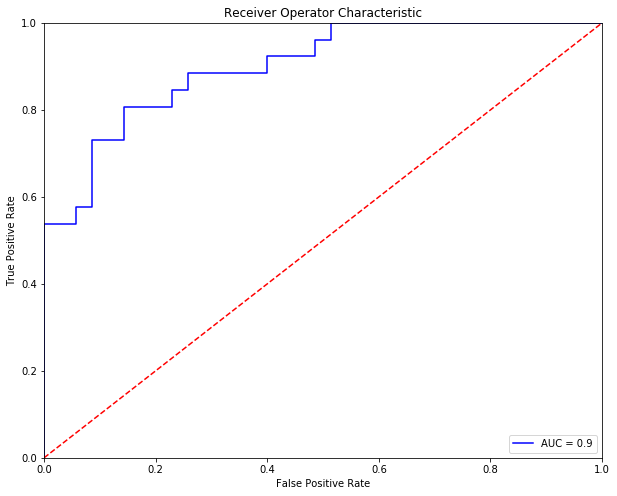

In [275]:
preds = predictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## DecisionTreeClassifier

In [270]:
modelDTC = DecisionTreeClassifier()
modelDTC.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [271]:
predictions = modelDTC.predict(x_test)
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [272]:
predictProb = modelDTC.predict_proba(x_test)
predictProb

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

## Decision Tree Classifier Evaluation

In [273]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

In [274]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.80      0.69      0.74        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [275]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns=['P No', 'P Yes'], index = ['A No', 'A Yes'])
con

,P No,P Yes
A No,27,5
A Yes,9,20


In [276]:
accuracy_score(y_test, predictions)

0.7704918032786885

In [277]:
matthews_corrcoef(y_test,predictions)

0.5416390355463555

In [278]:
log_loss(y_test, predictions)

7.926997828129517

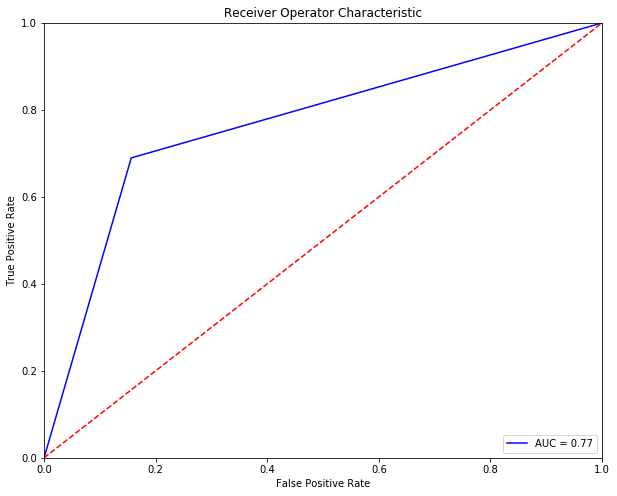

In [279]:
preds = predictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [280]:
print(modelDTC.score(x_train,y_train))

1.0


## Random Forest Classifier

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
modelRFC = RandomForestClassifier()

In [283]:
search = GridSearchCV(estimator=modelRFC,
                     param_grid={
                         'n_estimators':[100,200,300,500],
                         'bootstrap': ['True','False'],
                         'min_samples_split':[2,5,10,20]
                     },scoring='accuracy',
                      cv=5,n_jobs= -1)

In [ ]:
search.fit(x_train,y_train)

In [235]:
search.best_params_

{'bootstrap': 'False', 'min_samples_split': 2, 'n_estimators': 100}

In [236]:
modelRFC = RandomForestClassifier(bootstrap=False,min_samples_split=10,n_estimators=200)
modelRFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [237]:
predictions = modelRFC.predict(x_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [238]:
predictProb = modelRFC.predict_proba(x_test)
predictProb

array([[0.58133532, 0.41866468],
       [0.76185516, 0.23814484],
       [0.41918056, 0.58081944],
       [0.97578373, 0.02421627],
       [0.67903571, 0.32096429],
       [0.87908532, 0.12091468],
       [0.95437302, 0.04562698],
       [0.88294643, 0.11705357],
       [0.19664881, 0.80335119],
       [0.42481548, 0.57518452],
       [0.18944444, 0.81055556],
       [0.98614087, 0.01385913],
       [0.2136746 , 0.7863254 ],
       [0.58249802, 0.41750198],
       [0.03146825, 0.96853175],
       [0.81013294, 0.18986706],
       [0.33147024, 0.66852976],
       [0.62624008, 0.37375992],
       [0.23898016, 0.76101984],
       [0.99266071, 0.00733929],
       [0.109625  , 0.890375  ],
       [0.560375  , 0.439625  ],
       [0.63721429, 0.36278571],
       [0.49421032, 0.50578968],
       [0.83068254, 0.16931746],
       [0.49041468, 0.50958532],
       [0.24815675, 0.75184325],
       [0.61326389, 0.38673611],
       [0.0314623 , 0.9685377 ],
       [0.2669246 , 0.7330754 ],
       [0.

## Random Forest Classifier Evaluation

In [239]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

In [240]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        29
           1       0.73      0.59      0.66        32

    accuracy                           0.67        61
   macro avg       0.68      0.68      0.67        61
weighted avg       0.68      0.67      0.67        61



In [241]:
accuracy_score(y_test, predictions)

0.6721311475409836

In [242]:
matthews_corrcoef(y_test,predictions)

0.3558386094186696

In [243]:
log_loss(y_test, predictions)

11.324280739020082

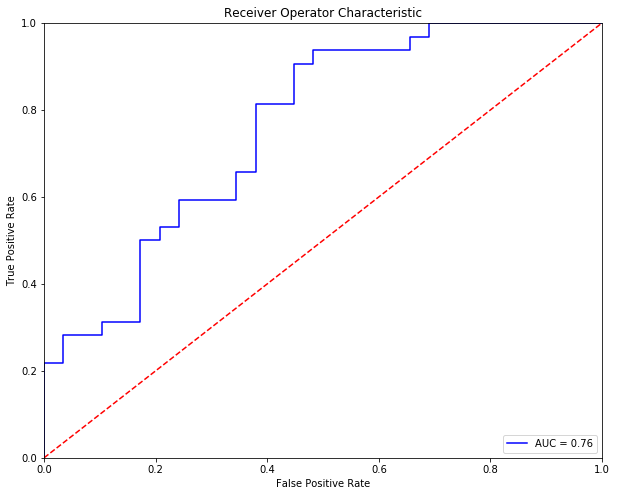

In [244]:
preds = predictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()